# Vegetable Price Prediction Using Machine Learning
Implemented for Ahemdabad district, Dhandhuka (Commodity = Cotton) 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [24]:
vegetables = pd.read_csv('Ahmedabad_Cotton.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Ahmedabad,Dhandhuka,Cotton,Shanker 6 (B) 30mm FIne,FAQ,5000,5625,5310,31-Dec-19
1,2,Ahmedabad,Dhandhuka,Cotton,Shanker 6 (B) 30mm FIne,FAQ,4900,5625,5260,30-Dec-19
2,3,Ahmedabad,Dhandhuka,Cotton,Shanker 6 (B) 30mm FIne,FAQ,4550,5555,5025,28-Dec-19
3,4,Ahmedabad,Dhandhuka,Cotton,Shanker 6 (B) 30mm FIne,FAQ,4500,5555,5030,27-Dec-19
4,5,Ahmedabad,Dhandhuka,Cotton,Shanker 6 (B) 30mm FIne,FAQ,4000,5500,4750,26-Dec-19


# Data Selection

select District Name == Ahemdabad <br>
Select Market Name == Dhandhuka <br>
Then Select Variety == Shanker 6 (B) 30mm FIne

In [25]:
vegetables = vegetables[vegetables['District Name'] == "Ahmedabad"]
vegetables = vegetables[vegetables['Market Name'] == "Dhandhuka"]
vegetables = vegetables[vegetables['Commodity'] == "Cotton"]
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Ahmedabad,Dhandhuka,Cotton,Shanker 6 (B) 30mm FIne,FAQ,5000,5625,5310,31-Dec-19
1,2,Ahmedabad,Dhandhuka,Cotton,Shanker 6 (B) 30mm FIne,FAQ,4900,5625,5260,30-Dec-19
2,3,Ahmedabad,Dhandhuka,Cotton,Shanker 6 (B) 30mm FIne,FAQ,4550,5555,5025,28-Dec-19
3,4,Ahmedabad,Dhandhuka,Cotton,Shanker 6 (B) 30mm FIne,FAQ,4500,5555,5030,27-Dec-19
4,5,Ahmedabad,Dhandhuka,Cotton,Shanker 6 (B) 30mm FIne,FAQ,4000,5500,4750,26-Dec-19


# Drop Unnecessary Colums
Sl no, Commodity, Grade are not  useful so drop it

In [26]:
#vegetables = vegetables[vegetables['District Name'] == "Ahmedabad"]
#vegetables = vegetables[vegetables['Market Name'] == "Dholka(Koth)"]
#vegetables = vegetables[vegetables['Variety'] == "Other"]
vegetables = vegetables.drop(['Sl no.','Commodity','Grade'], axis = 1)

In [27]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
9,Ahmedabad,Dhandhuka,Shanker 6 (B) 30mm FIne,5000,5505,5250,20
8,Ahmedabad,Dhandhuka,Shanker 6 (B) 30mm FIne,4880,5570,5225,21
7,Ahmedabad,Dhandhuka,Shanker 6 (B) 30mm FIne,4930,5620,5275,23
6,Ahmedabad,Dhandhuka,Shanker 6 (B) 30mm FIne,4790,5555,5170,24
5,Ahmedabad,Dhandhuka,Shanker 6 (B) 30mm FIne,5100,5505,5300,25
4,Ahmedabad,Dhandhuka,Shanker 6 (B) 30mm FIne,4000,5500,4750,26
3,Ahmedabad,Dhandhuka,Shanker 6 (B) 30mm FIne,4500,5555,5030,27
2,Ahmedabad,Dhandhuka,Shanker 6 (B) 30mm FIne,4550,5555,5025,28
1,Ahmedabad,Dhandhuka,Shanker 6 (B) 30mm FIne,4900,5625,5260,30
0,Ahmedabad,Dhandhuka,Shanker 6 (B) 30mm FIne,5000,5625,5310,31


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [28]:
climate = pd.read_csv('climate_Ahemdabad_Cotton_160.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index District Name Market Name                  Variety  \
0    166     Ahmedabad   Dhandhuka  Shanker 6 (B) 30mm FIne   
1    165     Ahmedabad   Dhandhuka  Shanker 6 (B) 30mm FIne   
2    164     Ahmedabad   Dhandhuka  Shanker 6 (B) 30mm FIne   
3    163     Ahmedabad   Dhandhuka  Shanker 6 (B) 30mm FIne   
4    162     Ahmedabad   Dhandhuka  Shanker 6 (B) 30mm FIne   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     5470                     5710   
1                     5455                     5695   
2                     5480                     5690   
3                     5510                     5680   
4                     5450                     5685   

   Modal Price (Rs./Quintal)  Price Date  Temp_Max   Temp_Avg  ...    Dew_Avg  \
0                       5590           1  92.21875  80.286875  ...  62.213125   
1                       5575           2  92.18125  80.169375  ...  61.988750   
2                       5585           3  92.14

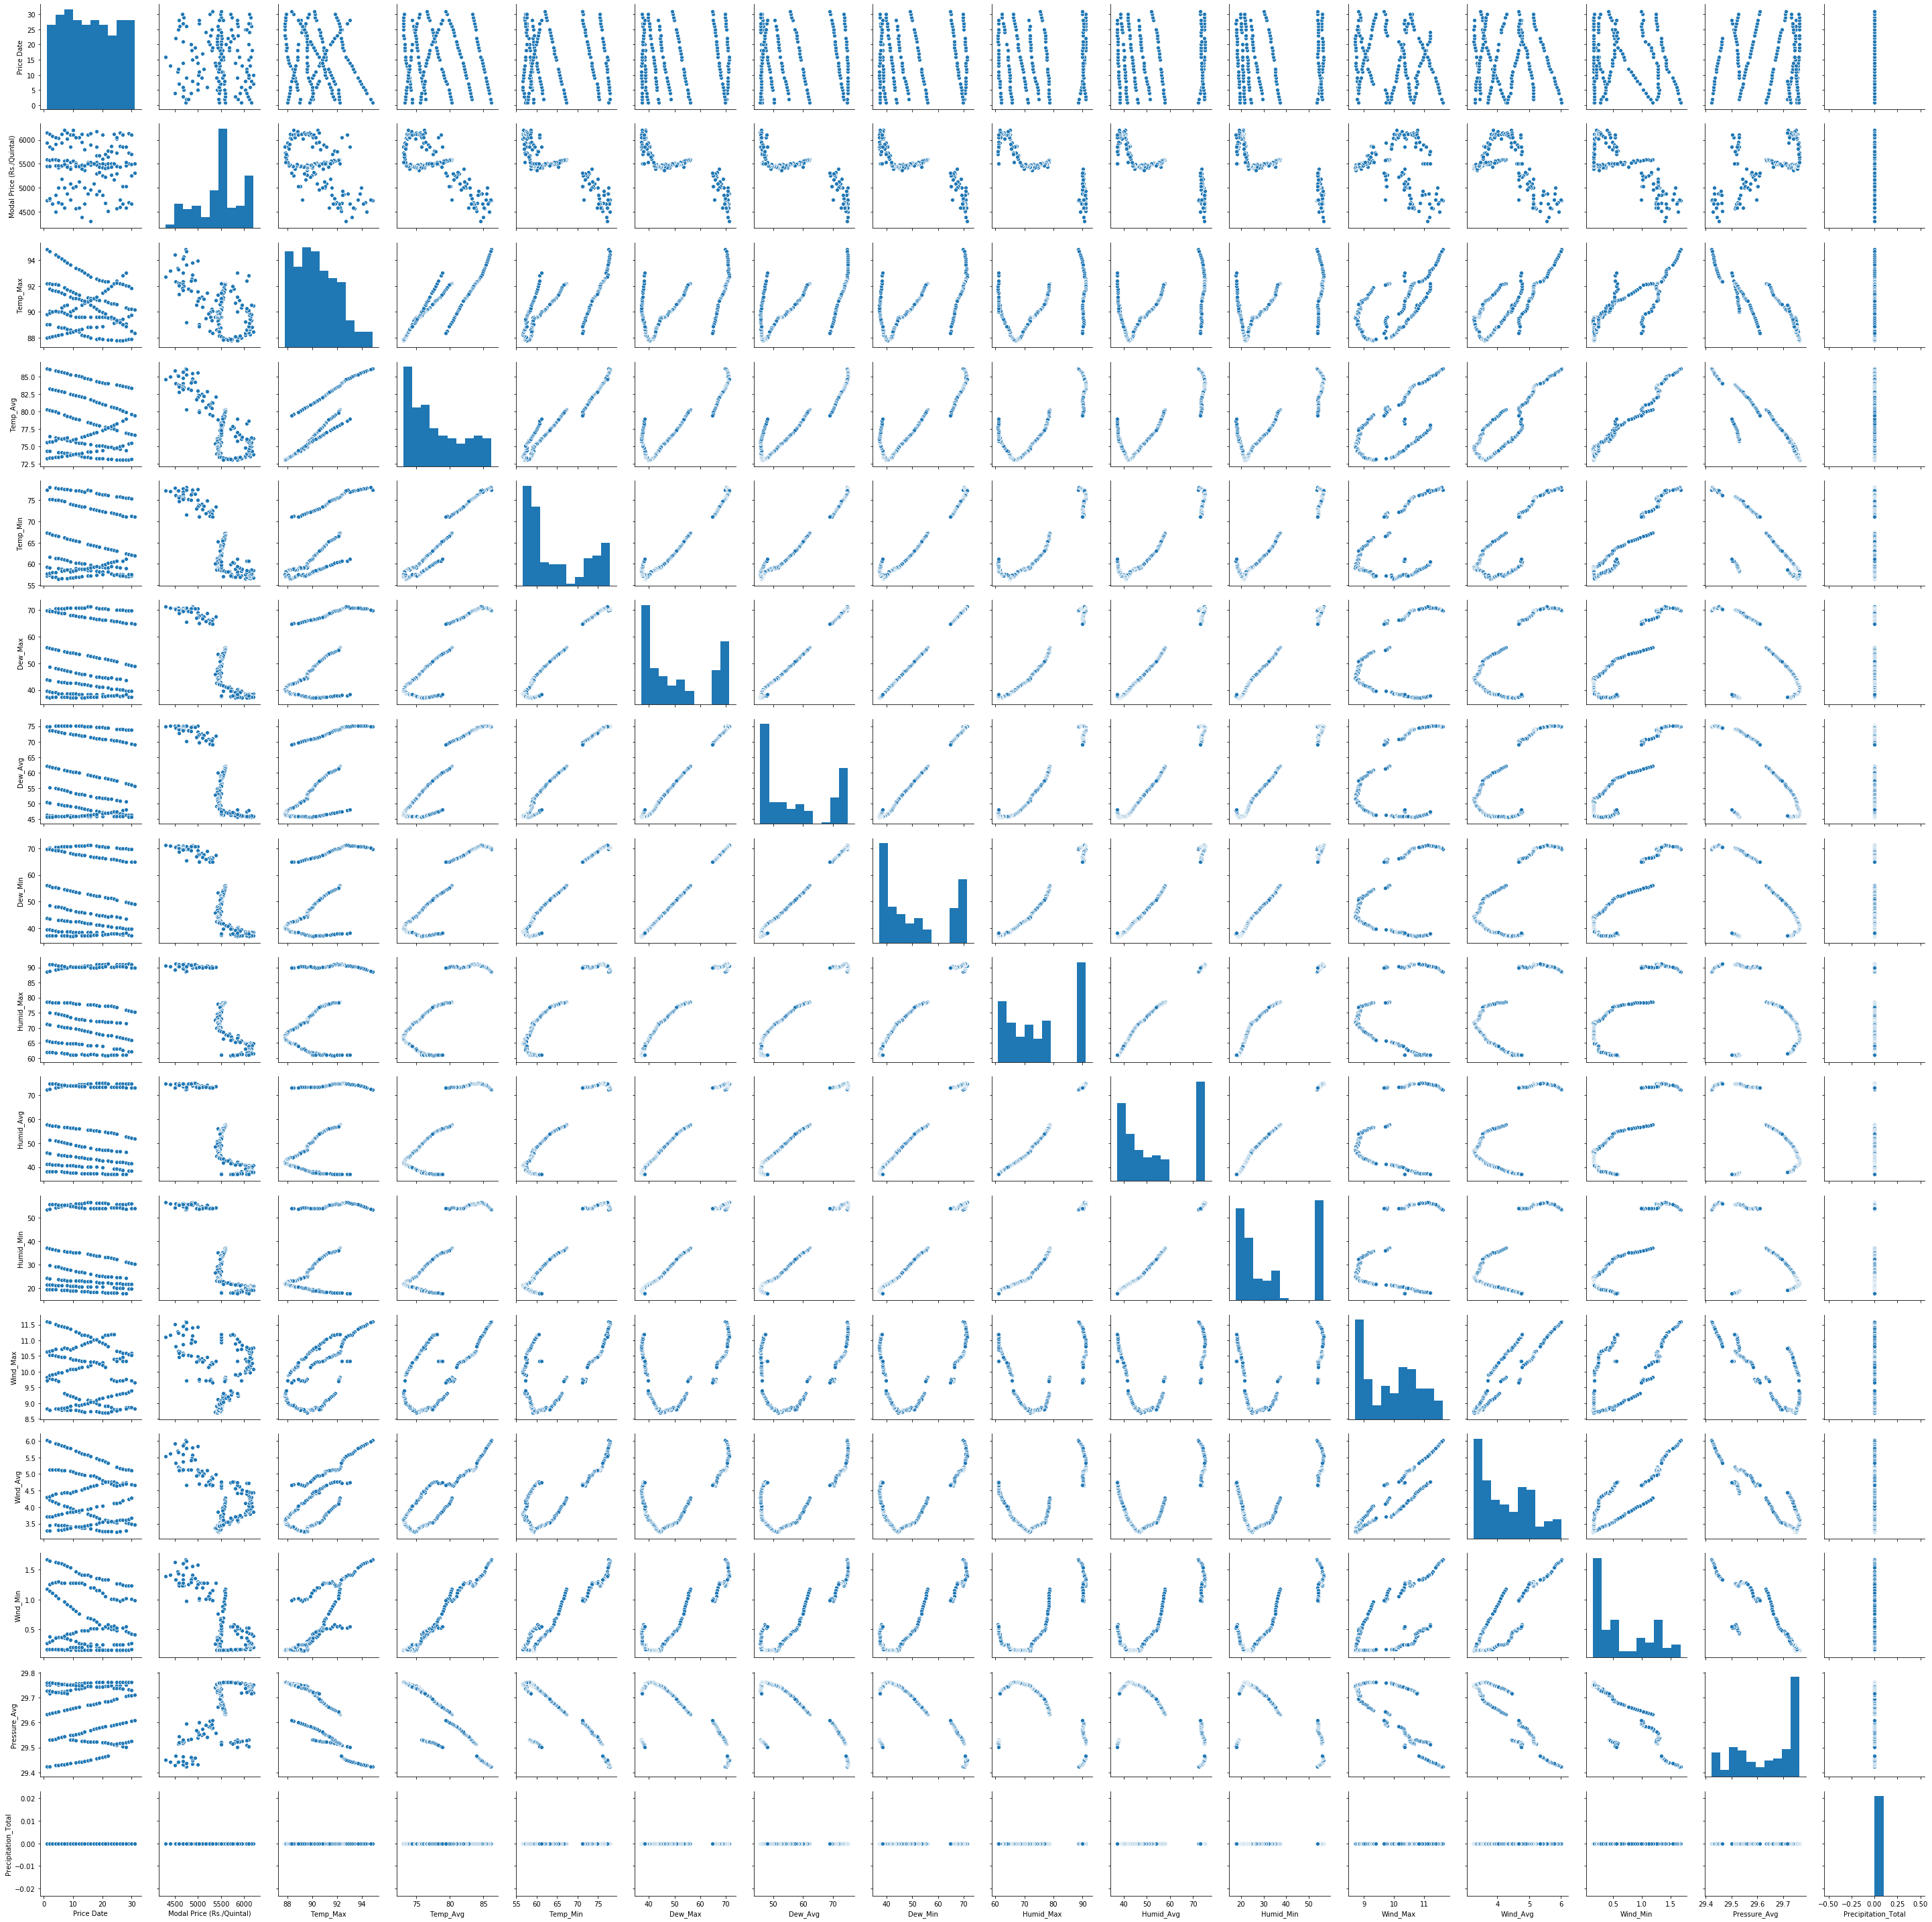

In [9]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [31]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 200,max_depth=300, random_state=42, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.3191254138946533


In [32]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [33]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9885250544769074
0.9015728980183412


# Feature Importance

In [34]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.02325382059633513
Temp_Max -> 0.019473702235865267
Temp_Avg -> 0.029248729589414615
Temp_Min -> 0.0778686735653885
Dew_Max -> 0.13356949071697094
Dew_Avg -> 0.14196816262398423
Dew_Min -> 0.12471860612393003
Humid_Max -> 0.07529622289064512
Humid_Avg -> 0.10385934626617016
Humid_Min -> 0.11057726015576434
Wind_Max -> 0.051147473183509325
Wind_Avg -> 0.051580988286144984
Wind_Min -> 0.019156790855451838
Pressure_Avg -> 0.03828073291042544
Precipitation_Total -> 0.0


# predicted vs Actual

In [35]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

5927.0->6100
4671.95->4600
6063.4125->6200
5467.375->5460
6007.45->6200
5454.575->5475
5840.975->5500
6119.0875->6100
5233.275->4750
5792.275->5500
5482.4->5485
5443.575->5430
5511.55->5490
5828.525->5540
5475.95->5505
5466.775->5420
4746.0->4940
5460.95->5440
5938.0->6055
5506.2->5495
6055.9375->6025
5499.1->5500
5524.85->5485
5527.75->5525
4668.875->4850
6035.0375->6120
4647.925->4575
5625.9->5680
5456.225->5475
5096.75->4590
5453.3->5465
4654.55->4665
4770.725->4690
6086.6625->6100
5253.4->5250
5575.325->5585
4763.15->4500
5837.95->5500
5803.6->5730
4639.5->4680
5452.45->5465
5454.625->5465
4804.375->4670
6090.6875->6175
6015.325->6050
6091.7->6115
5454.875->5475
5780.95->5705
5500.175->5505
6101.225->6140


In [36]:
print(sum_a/l)

95.19099999999995


# Create picke file

In [37]:
import pickle
filename = 'Ahemdabad_Cotton'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [38]:
filename = 'Ahemdabad_Cotton'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [39]:
print(sum/len(actual)) 

52.36826347305387
